# 低通，高通滤波

In [1]:
# 安装相关的库文件依赖
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline

读取图像

(([], []), ([], []))

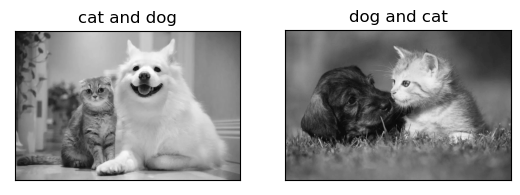

In [2]:
img1 = cv2.imread('./images/cat_dog.jpeg',0)                              #直接读为灰度图像
img2 = cv2.imread('./images/dog_cat.jpeg',0)                              #直接读为灰度图像

plt.subplot(121)
plt.imshow(img1,cmap="gray")
plt.title("cat and dog")
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img2,cmap="gray")
plt.title("dog and cat")
plt.xticks([]), plt.yticks([])

- 定义一个高斯低通滤波:
  - 如果FLAG=1则使用高斯高通滤波
  - 如果FLAG=0则使用高斯低通滤波
  - d表示的是滤波图形的大小
  - d表示的是滤波范围，
  - d越大，滤波的强度就越低
  - d越小，滤波的强度就越大

In [3]:
def Gaussian_Filter(image, d, flag=None):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)  # 对图像进行Fourier处理
    s1 = np.log(np.abs(fshift))  # 将Fourier变换的值取模

    def make_transform_matrix(d):
        transfor_matrix = np.zeros(image.shape)  # 创建一个等同于图像一样大小的零矩阵
        center_point = tuple(map(lambda x: (x-1)/2, s1.shape))  # 取图像的一个中心点
        for i in range(transfor_matrix.shape[0]):
            for j in range(transfor_matrix.shape[1]):  # 遍历所有的变换矩阵
                # 定义一个计算距离的函数
                def cal_distance(pa, pb):
                    # 计算pa和pb之间的距离
                    dis = np.sqrt((pa[0]-pb[0])**2+(pa[1]-pb[1])**2)
                    return dis

                dis = cal_distance(center_point, (i, j))  # 距离是这个点与中心点的距离
                if flag == 0:  # 如果FLAG等于0的话，采用e(-dis^2/(2*d^2))
                    # 的变换矩阵（使用高斯低通滤波）
                    transfor_matrix[i,
                                    j] = np.exp(-(dis ** 2) / (2 * (d ** 2)))
                else:  # 如果FLAG等于其他数值的话，采用1-e(-dis^2/(2*d^2))
                    # 的变换矩阵（使用的是高斯高通滤波）
                    transfor_matrix[i, j] = 1 - \
                        np.exp(-(dis ** 2) / (2 * (d ** 2)))
        return transfor_matrix

    d_matrix = make_transform_matrix(d)  # d_matrix等于变换矩阵(d)

    img = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift*d_matrix)))

    '''
    1. 先对频域内的图像做一个滤波的处理，通过变换矩阵把低频信息或者是高频信息给滤掉
    2. 将低频信息和高频信息移到原来的位置
    3. 傅里叶反变换回去
    4. 去反变换回去后的绝对值
    '''
    return img


# 图像显示


NameError: name 'img3' is not defined

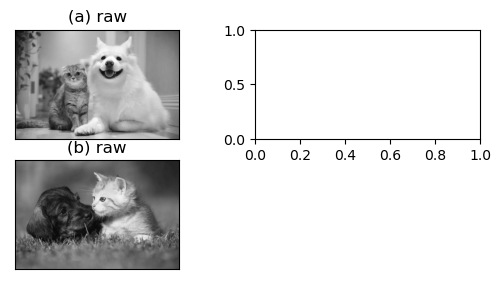

In [4]:
# 画图
fg1 = plt.figure('fg1')

plt.subplot(321)
plt.imshow(img1, cmap="gray")
plt.title("(a) raw")
plt.xticks([]), plt.yticks([])

plt.subplot(323)
plt.imshow(img2, cmap="gray")
plt.title("(b) raw")
plt.xticks([]), plt.yticks([])

plt.subplot(322)
plt.imshow(img3, cmap="gray")
plt.title("(a1) Gaussian high-pass filter")
plt.xticks([]), plt.yticks([])

plt.subplot(324)
plt.imshow(img4, cmap="gray")
plt.title("(b1) Gaussian low-pass filter")
plt.xticks([]), plt.yticks([])

"""
因为进过傅里叶变换图像的像素变成了浮点型，但是直方图均衡
函数的输入数据为整形，所以需要进行数据类型转换
"""
plt.subplot(325)
[height, width] = [int(img3.shape[0]), int(img3.shape[1])]
img4 = cv2.resize(img4, (width, height))
img5 = img3 + img4
plt.imshow(img5, cmap="gray")
plt.title("(d) merge")
plt.xticks([]), plt.yticks([])


In [ ]:
# 压缩图像
image1 = cv2.pyrDown(img5)    # 压缩至原来1/2大小(平滑图片并下采样)
image2 = cv2.pyrDown(image1)  # 压缩图像1至1/2大小
image3 = cv2.pyrDown(image2)  # 压缩图像2至1/2大小
image4 = cv2.pyrDown(image3)  # 压缩图像3至1/2大小
image5 = cv2.pyrDown(image4)  # 压缩图像4至1/2大小
image1 = cv2.resize(image1, (width, height))  # 放大至原来尺寸（图像分辨率依然被压缩）
image2 = cv2.resize(image2, (width, height))  # 放大至原来尺寸
image3 = cv2.resize(image3, (width, height))  # 放大至原来尺寸
image4 = cv2.resize(image4, (width, height))  # 放大至原来尺寸
image5 = cv2.resize(image5, (width, height))  # 放大至原来尺寸

# 显示图像
fg2 = plt.figure('fg2')
titles = [u'(a) raw ', u'(b) compress to 1/2', u'(c) compress to 1/4',
          u'(d) compress to 1/8', u'(e) compress to 1/16', u'(f) compress to 1/32']
images = [img5, image1, image2, image3, image4, image5]
for i in range(6):
    plt.subplot(3, 2, i+1), plt.imshow(images[i], 'gray'),
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()
